In [19]:
import tensorflow as tf

#tf.__version__

In [20]:
mnist = tf.keras.datasets.mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train , axis = 1)
x_test = tf.keras.utils.normalize(x_test , axis = 1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation= tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation= tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation= tf.nn.softmax))

model.compile(optimizer = 'adam',
             loss ='sparse_categorical_crossentropy' ,
             metrics = ['accuracy'])

model.fit(x_train,y_train,epochs=3)

Epoch 1/3
60000/60000 [==============================] - 14s 229us/sample - loss: 0.3323 - acc: 0.9070
Epoch 2/3
60000/60000 [==============================] - 9s 153us/sample - loss: 0.1245 - acc: 0.9610
Epoch 3/3
60000/60000 [==============================] - 9s 142us/sample - loss: 0.0834 - acc: 0.9731


In [18]:
print (x_train[0].shape)

(28, 28)


In [21]:
val_loss, val_acc = model.evaluate(x_test,y_test)
print(val_loss,val_acc)

10000/10000 [==============================] - 2s 231us/sample - loss: 0.1110 - acc: 0.9649
0.11103568484447897 0.9649


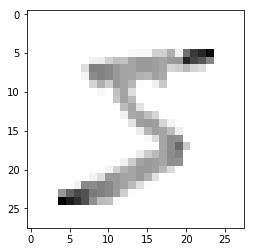

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [22]:
import matplotlib.pyplot as plt 

plt.imshow(x_train[0],cmap = plt.cm.binary)
plt.show()
print(x_train[0])

In [23]:
model.save('epic_num_reader.model')


In [27]:
import cv2
import tensorflow as tf

def prepare(filepath):
    img_size = 28
    img_array = cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
   # new_array = cv2.resize(img_size,img_size)
    return img_array #.reshape(-1,img_size,img_size,1)

model= tf.keras.models.load_model('epic_num_reader.model')

prediction = model.predict([prepare('IMG_20190731_075837.jpg')])

print (prediction)

AttributeError: 'list' object has no attribute 'shape'

In [12]:
predictions = model.predict([x_test])
print(predictions)

[[7.5506730e-09 4.4796371e-07 2.8164266e-05 ... 8.7280592e-14
  2.2661631e-13 5.2833985e-13]
 [4.0435268e-09 1.8834814e-02 9.8111522e-01 ... 8.5600548e-15
  8.6532025e-14 2.7801419e-14]
 [1.0844243e-06 9.9984217e-01 1.6933525e-05 ... 1.3319750e-09
  4.0398342e-09 2.5389557e-09]
 ...
 [1.7621014e-07 1.3822170e-06 2.7932760e-08 ... 1.3352772e-10
  5.6110651e-11 8.2916361e-11]
 [1.3951523e-06 1.6063817e-06 6.4643288e-08 ... 2.5153784e-11
  2.7180560e-11 1.7475471e-11]
 [2.1982389e-07 7.3563207e-08 9.3846774e-07 ... 4.7986957e-12
  6.5260705e-12 1.4922512e-12]]


In [13]:
import numpy as np
#size = 1000
print(np.argmax(predictions[19]))

4


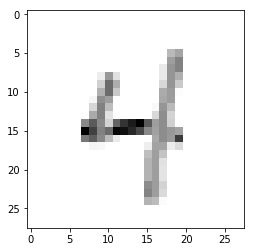

In [14]:
plt.imshow(x_test[19],cmap = plt.cm.binary)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [3]:
DATADIR = "G:\DATASETS\pets"
categories = ["dogs","cats"]

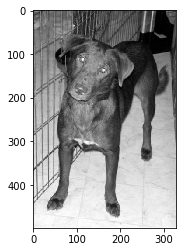

In [4]:
for category in categories:
    path=os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break 

In [6]:
print(img_array.shape)

(499, 327)


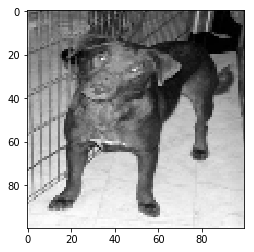

In [12]:
img_size = 100
new_array = cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array,cmap="gray")
plt.show()

In [14]:
training_data = []

def create_training_data() :
    for category in categories:
        path=os.path.join(DATADIR,category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try :
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

    

In [15]:
print(len(training_data))

8005


In [31]:
import random
random.shuffle(training_data)

In [32]:
for sample in training_data:
    print(sample[1])

1
1
0
0
0
1
0
1
1
0
0
0
1
0
0
1
1
1
1
1
1
1
1
0
0
0
1
0
0
1
1
0
1
1
1
1
1
0
0
0
0
1
0
0
1
0
1
1
0
0
1
1
1
1
1
0
1
0
0
1
0
0
1
1
1
1
1
1
0
0
1
1
1
0
0
0
1
1
1
0
1
0
0
1
0
0
1
1
1
0
0
0
0
1
0
1
0
0
0
0
1
1
1
1
0
1
1
1
1
0
0
1
0
1
0
1
0
1
0
0
1
0
1
1
0
0
0
0
0
0
1
1
0
0
1
1
0
0
0
1
0
0
0
1
1
0
1
1
1
0
0
1
0
1
0
1
1
1
0
0
0
1
0
1
0
1
0
1
1
1
1
1
0
1
0
0
1
1
0
0
1
1
1
0
1
0
1
1
1
0
0
1
1
0
1
0
0
0
1
1
1
1
1
1
1
1
0
1
0
1
1
1
0
1
0
0
1
0
1
0
0
1
1
1
1
0
1
0
0
1
0
0
0
1
0
1
1
1
0
0
1
0
0
0
0
0
0
0
1
1
0
1
0
1
1
1
1
0
0
0
1
1
1
1
1
1
0
0
0
0
0
1
0
0
1
0
1
1
1
0
0
1
0
0
0
1
0
1
1
0
0
1
0
1
1
0
0
0
1
0
1
0
1
0
0
0
1
0
0
0
1
0
0
1
1
0
1
1
1
1
0
1
1
0
0
1
0
1
1
1
0
0
1
0
1
0
1
1
1
1
1
0
0
1
1
0
0
0
0
0
0
0
1
0
1
0
0
1
0
0
0
0
0
0
0
0
0
1
1
1
0
0
0
1
1
0
1
0
1
1
1
0
1
1
1
0
0
0
0
1
0
0
1
0
1
1
1
0
1
0
0
1
0
0
1
0
1
1
1
1
1
1
0
1
1
1
1
1
0
0
0
0
1
0
0
0
1
1
0
1
1
1
1
0
1
0
1
1
0
1
0
1
0
0
1
1
0
1
1
1
1
0
1
0
1
0
0
0
0
0
1
0
1
1
0
1
0
1
1
1
1
1
0
0
1
0
1
1
1
0
1
1
1
0
1
1
0
1
0
0
0
1
0
0
1
0
0
0
0
0


1
0
0
0
1
1
0
0
1
1
1
1
1
1
1
0
1
0
1
0
1
0
1
0
0
0
1
0
0
1
0
1
0
1
1
0
1
1
0
1
1
0
1
0
0
1
1
0
0
1
0
0
0
1
0
0
0
0
0
1
1
0
1
0
0
0
1
1
1
1
1
0
0
0
0
0
1
1
0
1
1
0
0
0
1
1
1
0
0
0
0
0
0
0
0
1
0
1
1
1
1
1
1
1
1
1
1
1
0
0
1
0
1
0
0
1
0
1
1
1
0
0
1
1
1
0
1
0
0
1
0
0
1
0
1
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
1
1
0
1
0
1
1
1
1
1
0
0
0
0
1
0
0
0
0
0
0
1
1
0
1
0
0
1
1
0
0
1
0
0
1
1
0
1
1
1
0
0
0
1
0
0
1
1
1
1
1
0
0
0
0
1
1
1
0
1
0
0
0
1
0
1
0
0
0
1
0
1
0
1
0
1
0
1
1
0
1
0
1
0
0
0
0
0
1
0
0
0
1
0
1
1
1
1
1
1
1
1
0
1
0
1
1
1
1
1
1
1
1
0
1
0
0
0
1
1
0
1
0
0
1
1
0
0
0
0
0
0
0
1
0
1
1
0
1
1
0
0
0
0
0
0
1
1
0
1
0
0
1
1
1
1
0
1
0
0
1
1
0
0
0
0
1
1
1
1
1
0
1
0
0
1
1
1
1
1
0
1
0
1
0
1
0
1
0
0
0
1
0
0
0
0
0
1
1
0
0
1
1
1
0
1
1
0
0
1
0
0
1
1
1
1
1
1
0
1
0
0
1
1
0
0
1
1
1
1
1
0
0
1
0
0
1
1
1
1
1
0
0
0
1
1
1
1
1
1
0
0
0
0
0
1
0
0
1
0
0
1
0
1
1
1
1
1
1
0
1
1
1
0
1
0
0
1
1
0
1
0
1
0
0
0
0
0
1
1
0
0
1
0
1
1
1
0
1
0
1
0
1
0
1
1
1
1
1
1
0
1
0
1
0
1
1
1
0
0
0
1
0
0
1
1
1
0
0
0
0
0
1
1
1
0
0
0
0
1
0
1
1
0
1
0
1
1


In [62]:
X =[]
y =[]

In [71]:
for features,label in training_data :
    x.append(features)
    y.append(label)
#X= np.array(x).reshape(-1,img_size,img_size,1)

In [72]:
import pickle

pickle_out = open("x.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [73]:
pickle_in = open("x.pickle","rb")
x = pickle.load(pickle_in)

In [74]:
y

[1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,


In [76]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout , Activation , Flatten , Conv2D , MaxPooling2D
import pickle


In [77]:
x/255.0


TypeError: unsupported operand type(s) for /: 'list' and 'float'

In [79]:
#import Pillow


ModuleNotFoundError: No module named 'Pillow'

In [ ]:
import gym
import random
import numpy as np
import tflearn
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression


from statistics import median, mean
from collections import Counter

LR = 1e-3
env = gym.make("CartPole-v0")
env.reset()
goal_steps = 500
score_requirement = 50
initial_games = 10000



def some_random_games_first():
   
    for episode in range(5):
        env.reset()
        
        for t in range(goal_steps):
           
            #env.render()
            
            
            action = env.action_space.sample()
            
            
            observation, reward, done, info = env.step(action)
            if done:
                break
                
some_random_games_first()





def initial_population():
   
    training_data = []
   
    scores = []
    
    accepted_scores = []
  
    for _ in range(initial_games):
        score = 0
   
        game_memory = []
  
        prev_observation = []
  
        for _ in range(goal_steps):
          
           # env.render()
            action = random.randrange(0,2)
          
            observation, reward, done, info = env.step(action)
       
            if len(prev_observation) > 0 :
                game_memory.append([prev_observation, action])
            prev_observation = observation
            score+=reward
            if done: break

        if score >= score_requirement:
            accepted_scores.append(score)
            for data in game_memory:
                
                if data[1] == 1:
                    output = [0,1]
                elif data[1] == 0:
                    output = [1,0]
                    
                
                training_data.append([data[0], output])

        
        env.reset()
        
        scores.append(score)
    
   
   # training_data_save = np.array(training_data)
   # np.save('saved.npy',training_data_save)
    
    
    print('Average accepted score:',mean(accepted_scores))
    print('Median score for accepted scores:',median(accepted_scores))
    print(Counter(accepted_scores))
    
    return training_data








def neural_network_model(input_size):

    network = input_data(shape=[None, input_size, 1], name='input')

    network = fully_connected(network, 128, activation='relu')
    network = dropout(network, 0.8)

    network = fully_connected(network, 256, activation='relu')
    network = dropout(network, 0.8)

    network = fully_connected(network, 512, activation='relu')
    network = dropout(network, 0.8)

    network = fully_connected(network, 256, activation='relu')
    network = dropout(network, 0.8)

    network = fully_connected(network, 128, activation='relu')
    network = dropout(network, 0.8)

    network = fully_connected(network, 2, activation='softmax')
    network = regression(network, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')
    model = tflearn.DNN(network, tensorboard_dir='log')

    return model


def train_model(training_data, model=False):

    X = np.array([i[0] for i in training_data]).reshape(-1,len(training_data[0][0]),1)
    y = [i[1] for i in training_data]

    if not model:
        model = neural_network_model(input_size = len(X[0]))
    
    model.fit({'input': X}, {'targets': y}, n_epoch=3, snapshot_step=500, show_metric=True, run_id='openai_learning')
    return model






model = train_model(initial_population())







scores = []
choices = []
for each_game in range(30):
    score = 0
    game_memory = []
    prev_obs = []
    env.reset()
    for _ in range(goal_steps):
        env.render()

        if len(prev_obs)==0:
            action = random.randrange(0,2)
        else:
            action = np.argmax(model.predict(prev_obs.reshape(-1,len(prev_obs),1))[0])

        choices.append(action)
                
        new_observation, reward, done, info = env.step(action)
        prev_obs = new_observation
        game_memory.append([new_observation, action])
        score+=reward
        if done: break

    scores.append(score)

print('Average Score:',sum(scores)/len(scores))
print('choice 1:{}  choice 0:{}'.format(choices.count(1)/len(choices),choices.count(0)/len(choices)))
print(score_requirement)

Training Step: 481  | total loss: 0.67246 | time: 1.913s
| Adam | epoch: 002 | loss: 0.67246 - acc: 0.6013 -- iter: 08000/22755


In [2]:
def some_random_games_first():
   
    for episode in range(5):
        env.reset()
        
        for t in range(200):
           
            #env.render()
            
            
            action = env.action_space.sample()
            
            
            observation, reward, done, info = env.step(action)
            if done:
                break
                
some_random_games_first()

In [3]:
def initial_population():
   
    training_data = []
   
    scores = []
    
    accepted_scores = []
  
    for _ in range(10000):
        score = 0
   
        game_memory = []
  
        prev_observation = []
  
        for _ in range(500):
          
           # env.render()
            action = random.randrange(0,2)
          
            observation, reward, done, info = env.step(action)
       
            if len(prev_observation) > 0 :
                game_memory.append([prev_observation, action])
            prev_observation = observation
            score+=reward
            if done: break

        if score >= score_requirement:
            accepted_scores.append(score)
            for data in game_memory:
                
                if data[1] == 1:
                    output = [0,1]
                elif data[1] == 0:
                    output = [1,0]
                    
                
                training_data.append([data[0], output])

        
        env.reset()
        
        scores.append(score)
    
   
   # training_data_save = np.array(training_data)
   # np.save('saved.npy',training_data_save)
    
    
    print('Average accepted score:',mean(accepted_scores))
    print('Median score for accepted scores:',median(accepted_scores))
    print(Counter(accepted_scores))
    
    return training_data


In [4]:
def neural_network_model(input_size):

    network = input_data(shape=[None, input_size, 1], name='input')

    network = fully_connected(network, 128, activation='relu')
    network = dropout(network, 0.8)

    network = fully_connected(network, 256, activation='relu')
    network = dropout(network, 0.8)

    network = fully_connected(network, 512, activation='relu')
    network = dropout(network, 0.8)

    network = fully_connected(network, 256, activation='relu')
    network = dropout(network, 0.8)

    network = fully_connected(network, 128, activation='relu')
    network = dropout(network, 0.8)

    network = fully_connected(network, 2, activation='softmax')
    network = regression(network, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')
    model = tflearn.DNN(network, tensorboard_dir='log')

    return model


def train_model(training_data, model=False):

    X = np.array([i[0] for i in training_data]).reshape(-1,len(training_data[0][0]),1)
    y = [i[1] for i in training_data]

    if not model:
        model = neural_network_model(input_size = len(X[0]))
    
    model.fit({'input': X}, {'targets': y}, n_epoch=3, snapshot_step=500, show_metric=True, run_id='openai_learning')
    return model

In [5]:
#training_data = initial_population()

In [6]:
model = train_model(initial_population())

Training Step: 983  | total loss: 0.64527 | time: 5.030s
| Adam | epoch: 003 | loss: 0.64527 - acc: 0.6285 -- iter: 20928/20974
Training Step: 984  | total loss: 0.65913 | time: 5.046s
| Adam | epoch: 003 | loss: 0.65913 - acc: 0.6156 -- iter: 20974/20974
--


In [9]:
scores = []
choices = []
for each_game in range(100):
    score = 0
    game_memory = []
    prev_obs = []
    env.reset()
    for _ in range(goal_steps):
        #env.render()

        if len(prev_obs)==0:
            action = random.randrange(0,2)
        else:
            action = np.argmax(model.predict(prev_obs.reshape(-1,len(prev_obs),1))[0])

        choices.append(action)
                
        new_observation, reward, done, info = env.step(action)
        prev_obs = new_observation
        game_memory.append([new_observation, action])
        score+=reward
        if done: break

    scores.append(score)

print('Average Score:',sum(scores)/len(scores))
print('choice 1:{}  choice 0:{}'.format(choices.count(1)/len(choices),choices.count(0)/len(choices)))
print(score_requirement)

Average Score: 199.24
choice 1:0.5051194539249146  choice 0:0.4948805460750853
50


In [10]:
#model.save("198.model")
#model.save("200.model")